In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# load data 
df  = pd.read_parquet("../bldb/clean/csv/bldb_dset.parquet")
sbl = df[df.bla_class.str.contains("class_a|class_c|class_d")]
mbl = df[df.bla_class.str.contains("class_b1|class_b2|class_b3")]

def do_iscatter(df, x, y, hue, hover_name, hover_data):

    # plot
    fig = px.scatter(df, x=x, y=y,
    height=700, width=800, color=hue,
    hover_name=hover_name, 
    color_discrete_sequence=px.colors.qualitative.Plotly,
    hover_data=hover_data
    )

    fig.update_traces(marker=dict(size=8, line=dict(width=1,color='black')),selector=dict(mode='markers'))
    fig.update_layout(template="plotly_white")
    fig.update_yaxes(showline=True, linewidth=1, linecolor='LightGrey')
    fig.update_xaxes(showline=True, linewidth=1, linecolor='LightGrey')
    fig.show()

In [3]:
# load tsne  
mbl_carp      = pd.read_csv("../bldb/lowdim/tsne/csv/tsne_mbl_carp.csv")
mbl_esm1b     = pd.read_csv("../bldb/lowdim/tsne/csv/tsne_mbl_esm1b.csv")
mbl_esm2_3b   = pd.read_csv("../bldb/lowdim/tsne/csv/tsne_mbl_esm2_3b.csv")
mbl_esm2_650m = pd.read_csv("../bldb/lowdim/tsne/csv/tsne_mbl_esm2_650m.csv")
mbl_t5        = pd.read_csv("../bldb/lowdim/tsne/csv/tsne_mbl_t5xlu50.csv")

sbl_carp      = pd.read_csv("../bldb/lowdim/tsne/csv/tsne_sbl_carp.csv")
sbl_esm1b     = pd.read_csv("../bldb/lowdim/tsne/csv/tsne_sbl_esm1b.csv")
sbl_esm2_3b   = pd.read_csv("../bldb/lowdim/tsne/csv/tsne_sbl_esm2_3b.csv")
sbl_esm2_650m = pd.read_csv("../bldb/lowdim/tsne/csv/tsne_sbl_esm2_650m.csv")
sbl_t5        = pd.read_csv("../bldb/lowdim/tsne/csv/tsne_sbl_t5xlu50.csv")

# merge
tsne_sbl = pd.merge(sbl_esm1b, sbl_esm2_3b, on="seq_id",how="inner")
tsne_sbl = tsne_sbl.merge(sbl_esm2_650m, on="seq_id",how="inner")
tsne_sbl = tsne_sbl.merge(sbl_carp, on="seq_id",how="inner")
tsne_sbl = tsne_sbl.merge(sbl_t5, on="seq_id",how="inner")
tsne_sbl.to_parquet("../bldb/lowdim/tsne/csv/tsne_sbl_all_models.csv", index=False)

tsne_mbl = pd.merge(mbl_carp, mbl_esm1b, on="seq_id",how="inner")
tsne_mbl = tsne_mbl.merge(mbl_esm2_3b, on="seq_id",how="inner")
tsne_mbl = tsne_mbl.merge(mbl_esm2_650m, on="seq_id",how="inner")
tsne_mbl = tsne_mbl.merge(mbl_t5, on="seq_id",how="inner")
tsne_mbl.to_parquet("../bldb/lowdim/tsne/csv/tsne_mbl_all_models.csv", index=False)

# merge again
sbl = sbl.merge(tsne_sbl, on="seq_id", how="inner")
mbl = mbl.merge(tsne_mbl, on="seq_id", how="inner")

# show available info 
print(sbl.columns.to_list())

['#name', 'seq', 'length', 'filename', 'bla_class', 'protein_name', 'protein_family_filename', 'superfamily', 'protein_family', 'top_fam', 'seq_id', 'ambler_class', 'alternative_protein_name', 'subfamily', 'genpept_id', 'genbank_id', 'pubmed_id', 'seq_url', 'pdb_structures', 'mutants', 'phenotype', 'functional_info', 'source', 'bitscore', 'Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species', 'phylo_group', 'phylo_group_genus', 'phylo_group_sp', 'bla_subclass', 'esm1b', 'esm2_650m', 'esm2_3b', 'carp', 't5xlu50', 'molecular_weight', 'aromaticity', 'instability', 'gravy', 'isoelectric_point', 'entropy', 'helix', 'turn', 'sheet', 'pass_the_filter', 'is_clust_rep_30', 'is_clust_rep_60', 'is_clust_rep_90', 'has_af2_model', 'model', 'mean_plddt', 'resid_plddt', 'entryId', 'gene', 'uniprotAccession', 'uniprotId', 'uniprotDescription', 'taxId', 'organismScientificName', 'uniprotStart', 'uniprotEnd', 'modelCreatedDate', 'latestVersion', 'allVersions', 'isReviewed', 'isReferenceProt

In [4]:
perplexity       = [30,     50,     100,    200,    300,    400,    500,    600,    700,    800,    900,    1000  ]

kl_mbl_esm1b     = [0.4826, 0.4447, 0.3883, 0.3214, 0.2813, 0.2554, 0.2364, 0.2188, 0.1963, 0.1837, 0.1693, 0.1512]
kl_mbl_esm2_3b   = [0.4201, 0.3880, 0.3316, 0.2886, 0.2564, 0.2431, 0.2218, 0.1974, 0.1776, 0.1620, 0.1570, 0.1494]
kl_mbl_esm2_650m = [0.5210, 0.4847, 0.4323, 0.3815, 0.3377, 0.3217, 0.2913, 0.2627, 0.2421, 0.2249, 0.2127, 0.1952]
kl_mbl_carp      = [0.5068, 0.4622, 0.3890, 0.3138, 0.2710, 0.2487, 0.2330, 0.2053, 0.1969, 0.1755, 0.1598, 0.1513]
kl_mbl_t5        = [0.4697, 0.4317, 0.3708, 0.3120, 0.2764, 0.2466, 0.2290, 0.2121, 0.1938, 0.1707, 0.1602, 0.1498]

kl_sbl_esm1b     = [0.7543, 0.6670, 0.5693, 0.4856, 0.4358, 0.4035, 0.3800, 0.3608, 0.3421, 0.3254, 0.3076, 0.2996]
kl_sbl_esm2_3b   = [0.7084, 0.6232, 0.5233, 0.4418, 0.3959, 0.3672, 0.3473, 0.3347, 0.3202, 0.3070, 0.2977, 0.2886]
kl_sbl_esm2_650m = [0.7660, 0.6796, 0.5906, 0.5028, 0.4638, 0.4281, 0.4140, 0.3975, 0.3838, 0.3687, 0.3574, 0.3467]
kl_sbl_carp      = [0.8203, 0.7441, 0.6321, 0.5425, 0.4948, 0.4641, 0.4470, 0.4264, 0.4076, 0.3911, 0.3740, 0.3619]
kl_sbl_t5        = [0.7539, 0.6648, 0.5647, 0.4831, 0.4332, 0.4004, 0.3776, 0.3588, 0.3404, 0.3266, 0.3142, 0.3036]

df_kl = pd.DataFrame({
    'perplexity': perplexity,
    
    'mbl_esm1b':     kl_mbl_esm1b,
    'mbl_esm2_3b':   kl_mbl_esm2_3b,
    'mbl_esm2_650m': kl_mbl_esm2_650m,
    'mbl_carp':      kl_mbl_carp,
    'mbl_t5xlu50':   kl_mbl_t5,
    
    'sbl_esm1b':     kl_sbl_esm1b,
    'sbl_esm2_3b':   kl_sbl_esm2_3b,
    'sbl_esm2_650m': kl_sbl_esm2_650m,
    'sbl_carp':      kl_sbl_carp,
    'sbl_t5xlu50':   kl_sbl_t5
})

# Melt
models = ['esm1b', 'esm2_3b', 'esm2_650m', 'carp', 't5xlu50']
df_kl = df_kl.melt(id_vars=['perplexity'], var_name='data', value_name='kl')
df_kl['superfamily'] = df_kl['data'].apply(lambda x: 'SBL' if x.startswith('sbl') else 'MBL')
df_kl['model'] = df_kl['data'].apply(lambda x: x.split('_')[-1] if x.endswith(tuple(models)) else None)

/home/gama/anaconda3/envs/bio/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/gama/anaconda3/envs/bio/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


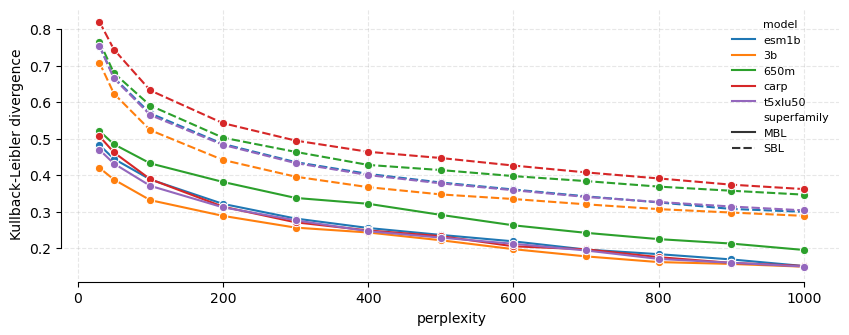

In [5]:
plt.figure(figsize=(10,3.5))
sns.lineplot(df_kl, x="perplexity", y="kl", hue="model", style="superfamily", marker="o")
plt.grid(alpha=0.3, linestyle="--")
plt.ylabel("Kullback-Leibler divergence")
plt.legend(frameon=False, fontsize=8)
sns.despine(trim=True, offset=2)

In [6]:
percent_sbl = [round((p / len(sbl)) * 100, 2) for p in perplexity]
percent_sbl

[0.12, 0.19, 0.39, 0.77, 1.16, 1.54, 1.93, 2.31, 2.7, 3.08, 3.47, 3.85]

In [7]:
percent_mbl = [round((p / len(mbl)) * 100, 2) for p in perplexity]
percent_mbl

[0.87, 1.44, 2.88, 5.77, 8.65, 11.53, 14.42, 17.3, 20.18, 23.07, 25.95, 28.84]

/home/gama/anaconda3/envs/bio/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/gama/anaconda3/envs/bio/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


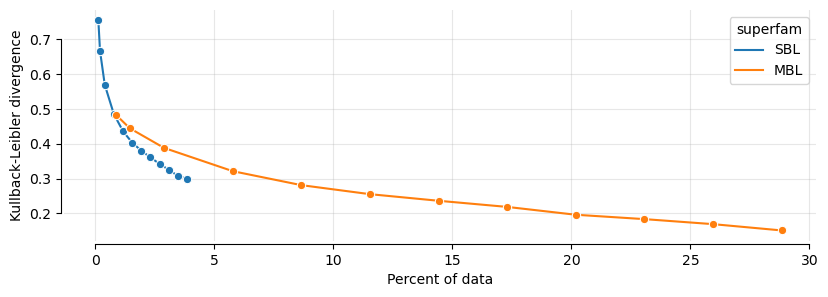

In [8]:
data = pd.DataFrame({
    "percent": percent_sbl + percent_mbl,
    "kl_divergence": kl_sbl_esm1b + kl_mbl_esm1b,
    "superfam": ["SBL"]*len(percent_sbl) + ["MBL"]*len(percent_mbl)
})

# Crear un gráfico de línea combinado
plt.figure(figsize=(9.7,3))
sns.lineplot(data=data, x="percent", y="kl_divergence", hue="superfam", marker="o")
plt.xlabel("Percent of data")
plt.grid(alpha=0.3)
sns.despine(trim=True, offset=2)
plt.ylabel("Kullback-Leibler divergence")
plt.show()

# SBL 

In [ ]:
mosaic = """
    ABCD
    EFGH
    IJKL
"""
hue="bla_class"

ax = plt.figure(figsize=(12,10), constrained_layout = True).subplot_mosaic(mosaic) 

sns.scatterplot(sbl, x="tsne1_esm1b_30",   y="tsne2_esm1b_30",   hue=hue, edgecolor="k", ax=ax["A"])
sns.scatterplot(sbl, x="tsne1_esm1b_50",   y="tsne2_esm1b_50",   hue=hue, edgecolor="k", ax=ax["B"])
sns.scatterplot(sbl, x="tsne1_esm1b_100",  y="tsne2_esm1b_100",  hue=hue, edgecolor="k", ax=ax["C"])
sns.scatterplot(sbl, x="tsne1_esm1b_200",  y="tsne2_esm1b_200",  hue=hue, edgecolor="k", ax=ax["D"])
sns.scatterplot(sbl, x="tsne1_esm1b_300",  y="tsne2_esm1b_300",  hue=hue, edgecolor="k", ax=ax["E"])
sns.scatterplot(sbl, x="tsne1_esm1b_400",  y="tsne2_esm1b_400",  hue=hue, edgecolor="k", ax=ax["F"])
sns.scatterplot(sbl, x="tsne1_esm1b_500",  y="tsne2_esm1b_500",  hue=hue, edgecolor="k", ax=ax["G"])
sns.scatterplot(sbl, x="tsne1_esm1b_600",  y="tsne2_esm1b_600",  hue=hue, edgecolor="k", ax=ax["H"])
sns.scatterplot(sbl, x="tsne1_esm1b_700",  y="tsne2_esm1b_700",  hue=hue, edgecolor="k", ax=ax["I"])
sns.scatterplot(sbl, x="tsne1_esm1b_800",  y="tsne2_esm1b_800",  hue=hue, edgecolor="k", ax=ax["J"])
sns.scatterplot(sbl, x="tsne1_esm1b_900",  y="tsne2_esm1b_900",  hue=hue, edgecolor="k", ax=ax["K"])
sns.scatterplot(sbl, x="tsne1_esm1b_1000", y="tsne2_esm1b_1000", hue=hue, edgecolor="k", ax=ax["L"])

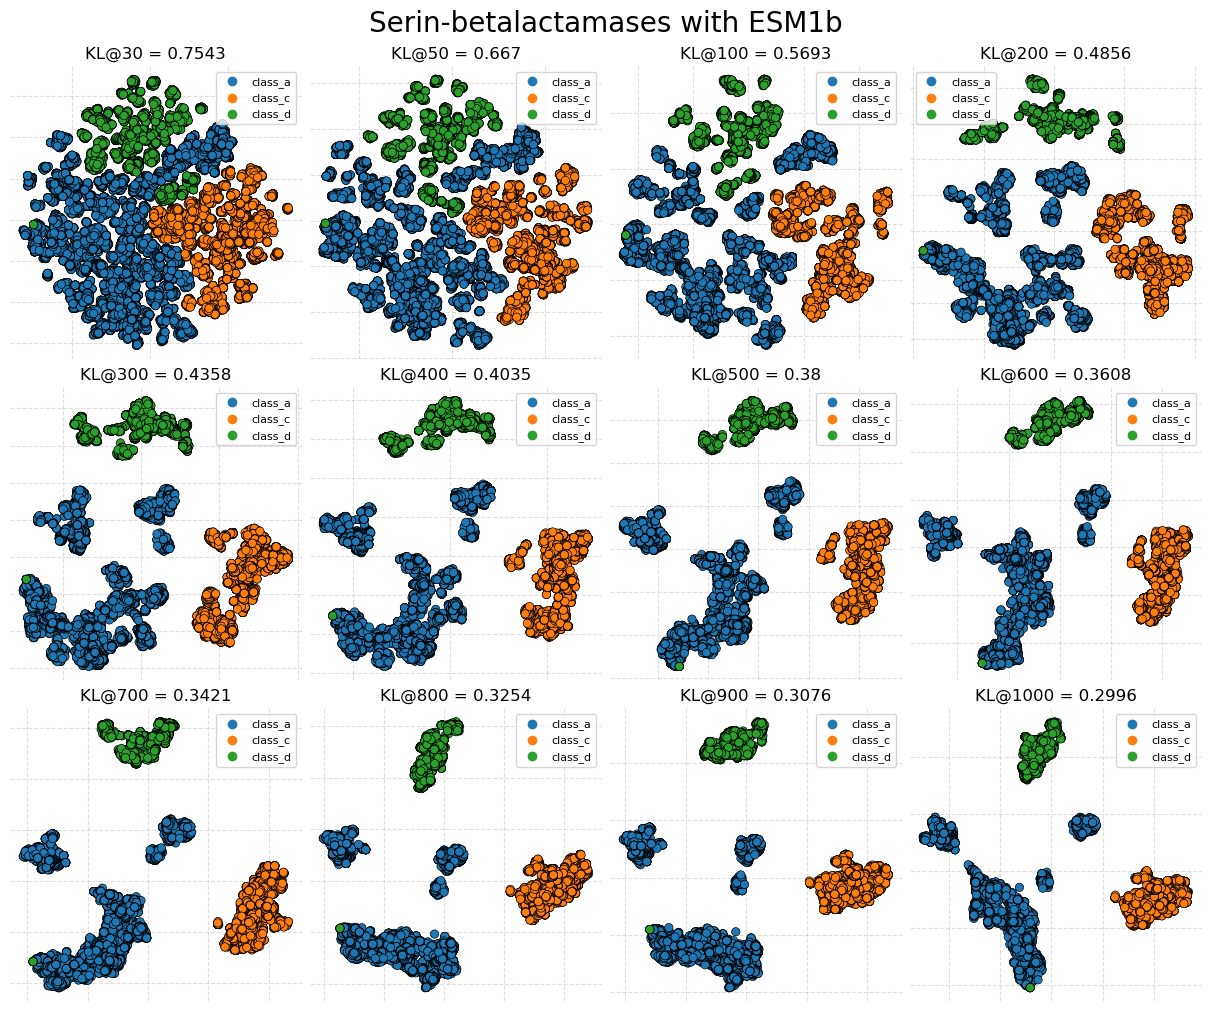

In [9]:
mosaic = """
    ABCD
    EFGH
    IJKL
"""
hue="bla_class"

ax = plt.figure(figsize=(12,10), constrained_layout = True).subplot_mosaic(mosaic) 

sns.scatterplot(sbl, x="tsne1_esm1b_30",   y="tsne2_esm1b_30",   hue=hue, edgecolor="k", ax=ax["A"])
sns.scatterplot(sbl, x="tsne1_esm1b_50",   y="tsne2_esm1b_50",   hue=hue, edgecolor="k", ax=ax["B"])
sns.scatterplot(sbl, x="tsne1_esm1b_100",  y="tsne2_esm1b_100",  hue=hue, edgecolor="k", ax=ax["C"])
sns.scatterplot(sbl, x="tsne1_esm1b_200",  y="tsne2_esm1b_200",  hue=hue, edgecolor="k", ax=ax["D"])
sns.scatterplot(sbl, x="tsne1_esm1b_300",  y="tsne2_esm1b_300",  hue=hue, edgecolor="k", ax=ax["E"])
sns.scatterplot(sbl, x="tsne1_esm1b_400",  y="tsne2_esm1b_400",  hue=hue, edgecolor="k", ax=ax["F"])
sns.scatterplot(sbl, x="tsne1_esm1b_500",  y="tsne2_esm1b_500",  hue=hue, edgecolor="k", ax=ax["G"])
sns.scatterplot(sbl, x="tsne1_esm1b_600",  y="tsne2_esm1b_600",  hue=hue, edgecolor="k", ax=ax["H"])
sns.scatterplot(sbl, x="tsne1_esm1b_700",  y="tsne2_esm1b_700",  hue=hue, edgecolor="k", ax=ax["I"])
sns.scatterplot(sbl, x="tsne1_esm1b_800",  y="tsne2_esm1b_800",  hue=hue, edgecolor="k", ax=ax["J"])
sns.scatterplot(sbl, x="tsne1_esm1b_900",  y="tsne2_esm1b_900",  hue=hue, edgecolor="k", ax=ax["K"])
sns.scatterplot(sbl, x="tsne1_esm1b_1000", y="tsne2_esm1b_1000", hue=hue, edgecolor="k", ax=ax["L"])

ax["A"].set_title(f"KL@{perplexity[0]} = {kl_sbl_esm1b[0]}")
ax["B"].set_title(f"KL@{perplexity[1]} = {kl_sbl_esm1b[1]}")
ax["C"].set_title(f"KL@{perplexity[2]} = {kl_sbl_esm1b[2]}")
ax["D"].set_title(f"KL@{perplexity[3]} = {kl_sbl_esm1b[3]}")
ax["E"].set_title(f"KL@{perplexity[4]} = {kl_sbl_esm1b[4]}")
ax["F"].set_title(f"KL@{perplexity[5]} = {kl_sbl_esm1b[5]}")
ax["G"].set_title(f"KL@{perplexity[6]} = {kl_sbl_esm1b[6]}")
ax["H"].set_title(f"KL@{perplexity[7]} = {kl_sbl_esm1b[7]}")
ax["I"].set_title(f"KL@{perplexity[8]} = {kl_sbl_esm1b[8]}")
ax["J"].set_title(f"KL@{perplexity[9]} = {kl_sbl_esm1b[9]}")
ax["K"].set_title(f"KL@{perplexity[10]} = {kl_sbl_esm1b[10]}")
ax["L"].set_title(f"KL@{perplexity[11]} = {kl_sbl_esm1b[11]}")

for i in "ABCDEFGHIJKL":
    ax[i].grid(alpha=0.4, linestyle="--")
    ax[i].set_frame_on(False)
    ax[i].legend(frameon=True, fontsize=8)
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")
    ax[i].tick_params(axis='both', colors='white')
    ax[i].set_axisbelow(True)
    
    
plt.suptitle("Serin-betalactamases with ESM1b",fontsize=20);

In [10]:
mosaic = """
    ABCDEFGHIJKL
"""

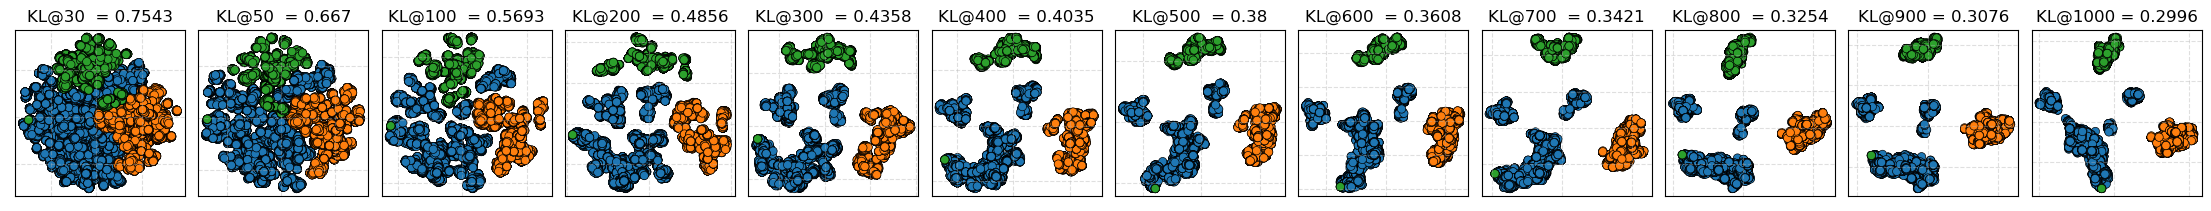

In [11]:
ax = plt.figure(figsize=(22,2), constrained_layout = True).subplot_mosaic(mosaic) 

sns.scatterplot(sbl, x="tsne1_esm1b_30",   y="tsne2_esm1b_30",   hue=hue, edgecolor="k", ax=ax["A"])
sns.scatterplot(sbl, x="tsne1_esm1b_50",   y="tsne2_esm1b_50",   hue=hue, edgecolor="k", ax=ax["B"])
sns.scatterplot(sbl, x="tsne1_esm1b_100",  y="tsne2_esm1b_100",  hue=hue, edgecolor="k", ax=ax["C"])
sns.scatterplot(sbl, x="tsne1_esm1b_200",  y="tsne2_esm1b_200",  hue=hue, edgecolor="k", ax=ax["D"])
sns.scatterplot(sbl, x="tsne1_esm1b_300",  y="tsne2_esm1b_300",  hue=hue, edgecolor="k", ax=ax["E"])
sns.scatterplot(sbl, x="tsne1_esm1b_400",  y="tsne2_esm1b_400",  hue=hue, edgecolor="k", ax=ax["F"])
sns.scatterplot(sbl, x="tsne1_esm1b_500",  y="tsne2_esm1b_500",  hue=hue, edgecolor="k", ax=ax["G"])
sns.scatterplot(sbl, x="tsne1_esm1b_600",  y="tsne2_esm1b_600",  hue=hue, edgecolor="k", ax=ax["H"])
sns.scatterplot(sbl, x="tsne1_esm1b_700",  y="tsne2_esm1b_700",  hue=hue, edgecolor="k", ax=ax["I"])
sns.scatterplot(sbl, x="tsne1_esm1b_800",  y="tsne2_esm1b_800",  hue=hue, edgecolor="k", ax=ax["J"])
sns.scatterplot(sbl, x="tsne1_esm1b_900",  y="tsne2_esm1b_900",  hue=hue, edgecolor="k", ax=ax["K"])
sns.scatterplot(sbl, x="tsne1_esm1b_1000", y="tsne2_esm1b_1000", hue=hue, edgecolor="k", ax=ax["L"])

ax["A"].set_title(f"KL@{perplexity[0]}  = {kl_sbl_esm1b[0]}" , fontsize=12)
ax["B"].set_title(f"KL@{perplexity[1]}  = {kl_sbl_esm1b[1]}" , fontsize=12)
ax["C"].set_title(f"KL@{perplexity[2]}  = {kl_sbl_esm1b[2]}" , fontsize=12)
ax["D"].set_title(f"KL@{perplexity[3]}  = {kl_sbl_esm1b[3]}" , fontsize=12)
ax["E"].set_title(f"KL@{perplexity[4]}  = {kl_sbl_esm1b[4]}" , fontsize=12)
ax["F"].set_title(f"KL@{perplexity[5]}  = {kl_sbl_esm1b[5]}" , fontsize=12)
ax["G"].set_title(f"KL@{perplexity[6]}  = {kl_sbl_esm1b[6]}" , fontsize=12)
ax["H"].set_title(f"KL@{perplexity[7]}  = {kl_sbl_esm1b[7]}" , fontsize=12)
ax["I"].set_title(f"KL@{perplexity[8]}  = {kl_sbl_esm1b[8]}" , fontsize=12)
ax["J"].set_title(f"KL@{perplexity[9]}  = {kl_sbl_esm1b[9]}" , fontsize=12)
ax["K"].set_title(f"KL@{perplexity[10]} = {kl_sbl_esm1b[10]}", fontsize=12)
ax["L"].set_title(f"KL@{perplexity[11]} = {kl_sbl_esm1b[11]}", fontsize=12)

for i in "ABCDEFGHIJKL":
    ax[i].grid(alpha=0.4, linestyle="--")
    ax[i].legend().set_visible(False)
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")

for i in "ABCDEFGHIJKL":
    ax[i].tick_params(color='white', labelcolor='white')
    for spine in ax[i].spines.values():
        spine.set_edgecolor('black')

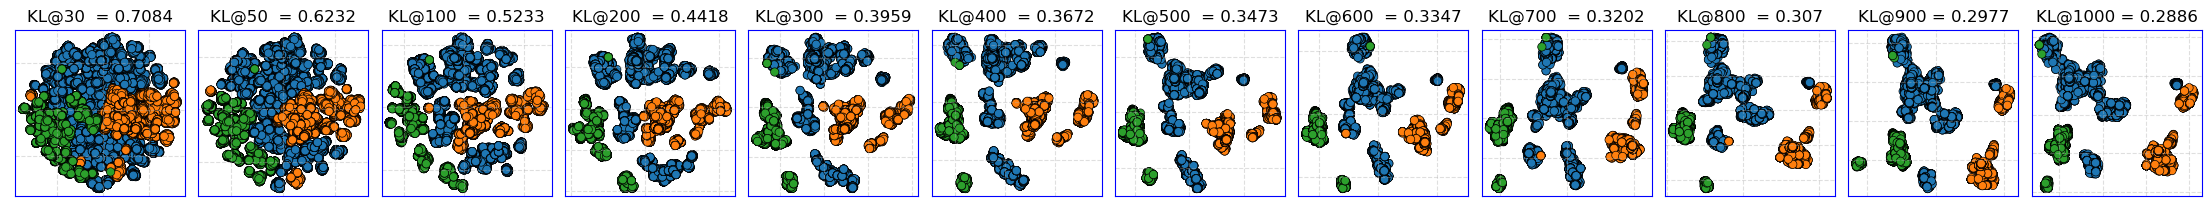

In [12]:
ax = plt.figure(figsize=(22,2), constrained_layout = True).subplot_mosaic(mosaic) 

sns.scatterplot(sbl, x="tsne1_esm2_3b_30",   y="tsne2_esm2_3b_30",   hue=hue, edgecolor="k", ax=ax["A"])
sns.scatterplot(sbl, x="tsne1_esm2_3b_50",   y="tsne2_esm2_3b_50",   hue=hue, edgecolor="k", ax=ax["B"])
sns.scatterplot(sbl, x="tsne1_esm2_3b_100",  y="tsne2_esm2_3b_100",  hue=hue, edgecolor="k", ax=ax["C"])
sns.scatterplot(sbl, x="tsne1_esm2_3b_200",  y="tsne2_esm2_3b_200",  hue=hue, edgecolor="k", ax=ax["D"])
sns.scatterplot(sbl, x="tsne1_esm2_3b_300",  y="tsne2_esm2_3b_300",  hue=hue, edgecolor="k", ax=ax["E"])
sns.scatterplot(sbl, x="tsne1_esm2_3b_400",  y="tsne2_esm2_3b_400",  hue=hue, edgecolor="k", ax=ax["F"])
sns.scatterplot(sbl, x="tsne1_esm2_3b_500",  y="tsne2_esm2_3b_500",  hue=hue, edgecolor="k", ax=ax["G"])
sns.scatterplot(sbl, x="tsne1_esm2_3b_600",  y="tsne2_esm2_3b_600",  hue=hue, edgecolor="k", ax=ax["H"])
sns.scatterplot(sbl, x="tsne1_esm2_3b_700",  y="tsne2_esm2_3b_700",  hue=hue, edgecolor="k", ax=ax["I"])
sns.scatterplot(sbl, x="tsne1_esm2_3b_800",  y="tsne2_esm2_3b_800",  hue=hue, edgecolor="k", ax=ax["J"])
sns.scatterplot(sbl, x="tsne1_esm2_3b_900",  y="tsne2_esm2_3b_900",  hue=hue, edgecolor="k", ax=ax["K"])
sns.scatterplot(sbl, x="tsne1_esm2_3b_1000", y="tsne2_esm2_3b_1000", hue=hue, edgecolor="k", ax=ax["L"])

ax["A"].set_title(f"KL@{perplexity[0]}  = {kl_sbl_esm2_3b[0]}" , fontsize=12)
ax["B"].set_title(f"KL@{perplexity[1]}  = {kl_sbl_esm2_3b[1]}" , fontsize=12)
ax["C"].set_title(f"KL@{perplexity[2]}  = {kl_sbl_esm2_3b[2]}" , fontsize=12)
ax["D"].set_title(f"KL@{perplexity[3]}  = {kl_sbl_esm2_3b[3]}" , fontsize=12)
ax["E"].set_title(f"KL@{perplexity[4]}  = {kl_sbl_esm2_3b[4]}" , fontsize=12)
ax["F"].set_title(f"KL@{perplexity[5]}  = {kl_sbl_esm2_3b[5]}" , fontsize=12)
ax["G"].set_title(f"KL@{perplexity[6]}  = {kl_sbl_esm2_3b[6]}" , fontsize=12)
ax["H"].set_title(f"KL@{perplexity[7]}  = {kl_sbl_esm2_3b[7]}" , fontsize=12)
ax["I"].set_title(f"KL@{perplexity[8]}  = {kl_sbl_esm2_3b[8]}" , fontsize=12)
ax["J"].set_title(f"KL@{perplexity[9]}  = {kl_sbl_esm2_3b[9]}" , fontsize=12)
ax["K"].set_title(f"KL@{perplexity[10]} = {kl_sbl_esm2_3b[10]}", fontsize=12)
ax["L"].set_title(f"KL@{perplexity[11]} = {kl_sbl_esm2_3b[11]}", fontsize=12)

for i in "ABCDEFGHIJKL":
    ax[i].grid(alpha=0.4, linestyle="--")
    ax[i].legend().set_visible(False)
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")

for i in "ABCDEFGHIJKL":
    ax[i].tick_params(color='white', labelcolor='white')
    for spine in ax[i].spines.values():
        spine.set_edgecolor('blue')

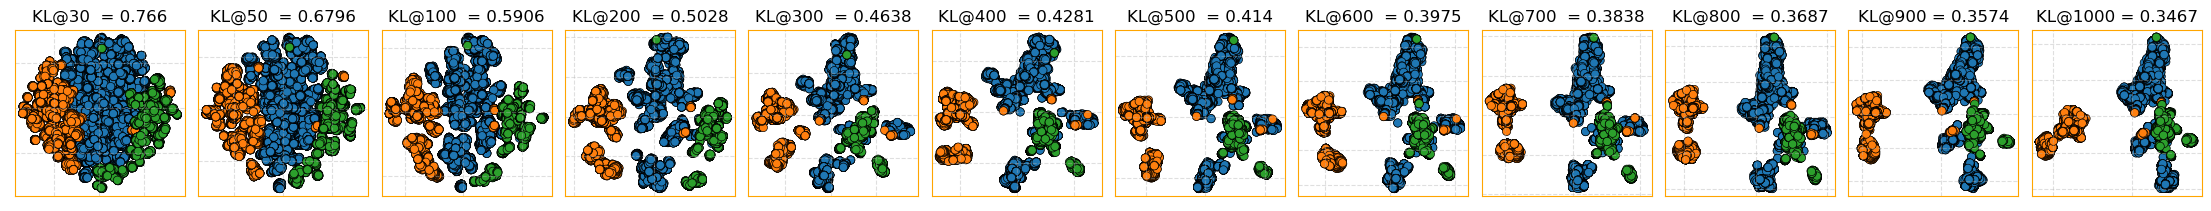

In [13]:
ax = plt.figure(figsize=(22,2), constrained_layout = True).subplot_mosaic(mosaic) 

sns.scatterplot(sbl, x="tsne1_esm2_650m_30",   y="tsne2_esm2_650m_30",   hue=hue, edgecolor="k", ax=ax["A"])
sns.scatterplot(sbl, x="tsne1_esm2_650m_50",   y="tsne2_esm2_650m_50",   hue=hue, edgecolor="k", ax=ax["B"])
sns.scatterplot(sbl, x="tsne1_esm2_650m_100",  y="tsne2_esm2_650m_100",  hue=hue, edgecolor="k", ax=ax["C"])
sns.scatterplot(sbl, x="tsne1_esm2_650m_200",  y="tsne2_esm2_650m_200",  hue=hue, edgecolor="k", ax=ax["D"])
sns.scatterplot(sbl, x="tsne1_esm2_650m_300",  y="tsne2_esm2_650m_300",  hue=hue, edgecolor="k", ax=ax["E"])
sns.scatterplot(sbl, x="tsne1_esm2_650m_400",  y="tsne2_esm2_650m_400",  hue=hue, edgecolor="k", ax=ax["F"])
sns.scatterplot(sbl, x="tsne1_esm2_650m_500",  y="tsne2_esm2_650m_500",  hue=hue, edgecolor="k", ax=ax["G"])
sns.scatterplot(sbl, x="tsne1_esm2_650m_600",  y="tsne2_esm2_650m_600",  hue=hue, edgecolor="k", ax=ax["H"])
sns.scatterplot(sbl, x="tsne1_esm2_650m_700",  y="tsne2_esm2_650m_700",  hue=hue, edgecolor="k", ax=ax["I"])
sns.scatterplot(sbl, x="tsne1_esm2_650m_800",  y="tsne2_esm2_650m_800",  hue=hue, edgecolor="k", ax=ax["J"])
sns.scatterplot(sbl, x="tsne1_esm2_650m_900",  y="tsne2_esm2_650m_900",  hue=hue, edgecolor="k", ax=ax["K"])
sns.scatterplot(sbl, x="tsne1_esm2_650m_1000", y="tsne2_esm2_650m_1000", hue=hue, edgecolor="k", ax=ax["L"])

ax["A"].set_title(f"KL@{perplexity[0]}  = {kl_sbl_esm2_650m[0]}" , fontsize=12)
ax["B"].set_title(f"KL@{perplexity[1]}  = {kl_sbl_esm2_650m[1]}" , fontsize=12)
ax["C"].set_title(f"KL@{perplexity[2]}  = {kl_sbl_esm2_650m[2]}" , fontsize=12)
ax["D"].set_title(f"KL@{perplexity[3]}  = {kl_sbl_esm2_650m[3]}" , fontsize=12)
ax["E"].set_title(f"KL@{perplexity[4]}  = {kl_sbl_esm2_650m[4]}" , fontsize=12)
ax["F"].set_title(f"KL@{perplexity[5]}  = {kl_sbl_esm2_650m[5]}" , fontsize=12)
ax["G"].set_title(f"KL@{perplexity[6]}  = {kl_sbl_esm2_650m[6]}" , fontsize=12)
ax["H"].set_title(f"KL@{perplexity[7]}  = {kl_sbl_esm2_650m[7]}" , fontsize=12)
ax["I"].set_title(f"KL@{perplexity[8]}  = {kl_sbl_esm2_650m[8]}" , fontsize=12)
ax["J"].set_title(f"KL@{perplexity[9]}  = {kl_sbl_esm2_650m[9]}" , fontsize=12)
ax["K"].set_title(f"KL@{perplexity[10]} = {kl_sbl_esm2_650m[10]}", fontsize=12)
ax["L"].set_title(f"KL@{perplexity[11]} = {kl_sbl_esm2_650m[11]}", fontsize=12)

for i in "ABCDEFGHIJKL":
    ax[i].grid(alpha=0.4, linestyle="--")
    ax[i].legend().set_visible(False)
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")

for i in "ABCDEFGHIJKL":
    ax[i].tick_params(color='white', labelcolor='white')
    for spine in ax[i].spines.values():
        spine.set_edgecolor('orange')

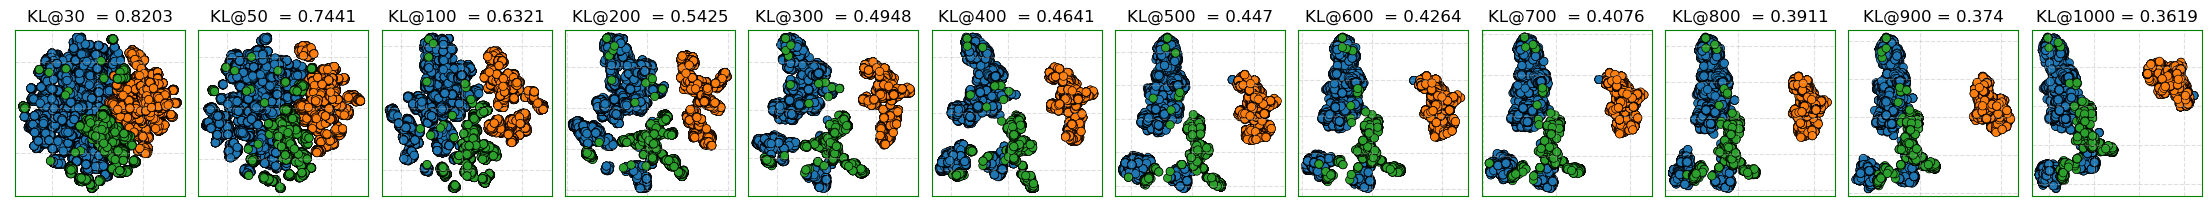

In [14]:
ax = plt.figure(figsize=(22,2), constrained_layout = True).subplot_mosaic(mosaic) 

sns.scatterplot(sbl, x="tsne1_carp_30",   y="tsne2_carp_30",   hue=hue, edgecolor="k", ax=ax["A"])
sns.scatterplot(sbl, x="tsne1_carp_50",   y="tsne2_carp_50",   hue=hue, edgecolor="k", ax=ax["B"])
sns.scatterplot(sbl, x="tsne1_carp_100",  y="tsne2_carp_100",  hue=hue, edgecolor="k", ax=ax["C"])
sns.scatterplot(sbl, x="tsne1_carp_200",  y="tsne2_carp_200",  hue=hue, edgecolor="k", ax=ax["D"])
sns.scatterplot(sbl, x="tsne1_carp_300",  y="tsne2_carp_300",  hue=hue, edgecolor="k", ax=ax["E"])
sns.scatterplot(sbl, x="tsne1_carp_400",  y="tsne2_carp_400",  hue=hue, edgecolor="k", ax=ax["F"])
sns.scatterplot(sbl, x="tsne1_carp_500",  y="tsne2_carp_500",  hue=hue, edgecolor="k", ax=ax["G"])
sns.scatterplot(sbl, x="tsne1_carp_600",  y="tsne2_carp_600",  hue=hue, edgecolor="k", ax=ax["H"])
sns.scatterplot(sbl, x="tsne1_carp_700",  y="tsne2_carp_700",  hue=hue, edgecolor="k", ax=ax["I"])
sns.scatterplot(sbl, x="tsne1_carp_800",  y="tsne2_carp_800",  hue=hue, edgecolor="k", ax=ax["J"])
sns.scatterplot(sbl, x="tsne1_carp_900",  y="tsne2_carp_900",  hue=hue, edgecolor="k", ax=ax["K"])
sns.scatterplot(sbl, x="tsne1_carp_1000", y="tsne2_carp_1000", hue=hue, edgecolor="k", ax=ax["L"])

ax["A"].set_title(f"KL@{perplexity[0]}  = {kl_sbl_carp[0]}" , fontsize=12)
ax["B"].set_title(f"KL@{perplexity[1]}  = {kl_sbl_carp[1]}" , fontsize=12)
ax["C"].set_title(f"KL@{perplexity[2]}  = {kl_sbl_carp[2]}" , fontsize=12)
ax["D"].set_title(f"KL@{perplexity[3]}  = {kl_sbl_carp[3]}" , fontsize=12)
ax["E"].set_title(f"KL@{perplexity[4]}  = {kl_sbl_carp[4]}" , fontsize=12)
ax["F"].set_title(f"KL@{perplexity[5]}  = {kl_sbl_carp[5]}" , fontsize=12)
ax["G"].set_title(f"KL@{perplexity[6]}  = {kl_sbl_carp[6]}" , fontsize=12)
ax["H"].set_title(f"KL@{perplexity[7]}  = {kl_sbl_carp[7]}" , fontsize=12)
ax["I"].set_title(f"KL@{perplexity[8]}  = {kl_sbl_carp[8]}" , fontsize=12)
ax["J"].set_title(f"KL@{perplexity[9]}  = {kl_sbl_carp[9]}" , fontsize=12)
ax["K"].set_title(f"KL@{perplexity[10]} = {kl_sbl_carp[10]}", fontsize=12)
ax["L"].set_title(f"KL@{perplexity[11]} = {kl_sbl_carp[11]}", fontsize=12)

for i in "ABCDEFGHIJKL":
    ax[i].grid(alpha=0.4, linestyle="--")
    ax[i].legend().set_visible(False)
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")

for i in "ABCDEFGHIJKL":
    ax[i].tick_params(color='white', labelcolor='white')
    for spine in ax[i].spines.values():
        spine.set_edgecolor('green')

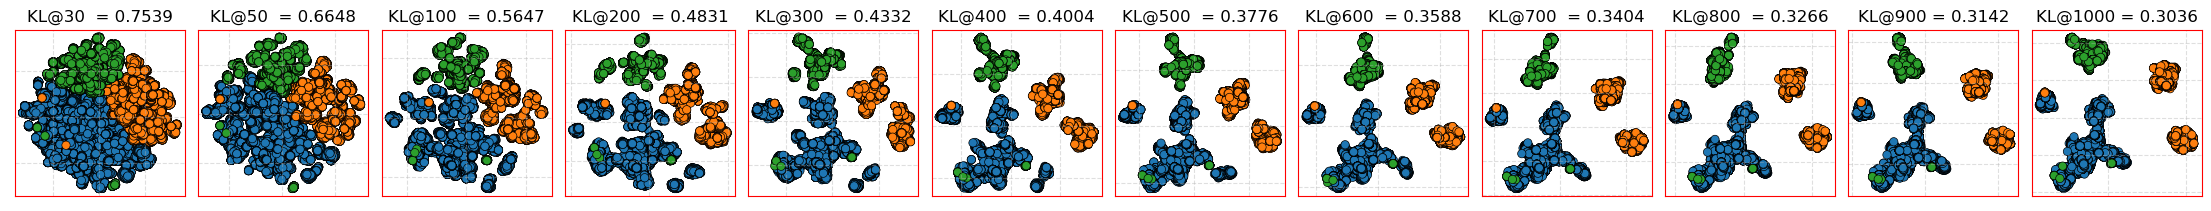

In [15]:
ax = plt.figure(figsize=(22,2), constrained_layout = True).subplot_mosaic(mosaic) 

sns.scatterplot(sbl, x="tsne1_t5xlu50_30",   y="tsne2_t5xlu50_30",   hue=hue, edgecolor="k", ax=ax["A"])
sns.scatterplot(sbl, x="tsne1_t5xlu50_50",   y="tsne2_t5xlu50_50",   hue=hue, edgecolor="k", ax=ax["B"])
sns.scatterplot(sbl, x="tsne1_t5xlu50_100",  y="tsne2_t5xlu50_100",  hue=hue, edgecolor="k", ax=ax["C"])
sns.scatterplot(sbl, x="tsne1_t5xlu50_200",  y="tsne2_t5xlu50_200",  hue=hue, edgecolor="k", ax=ax["D"])
sns.scatterplot(sbl, x="tsne1_t5xlu50_300",  y="tsne2_t5xlu50_300",  hue=hue, edgecolor="k", ax=ax["E"])
sns.scatterplot(sbl, x="tsne1_t5xlu50_400",  y="tsne2_t5xlu50_400",  hue=hue, edgecolor="k", ax=ax["F"])
sns.scatterplot(sbl, x="tsne1_t5xlu50_500",  y="tsne2_t5xlu50_500",  hue=hue, edgecolor="k", ax=ax["G"])
sns.scatterplot(sbl, x="tsne1_t5xlu50_600",  y="tsne2_t5xlu50_600",  hue=hue, edgecolor="k", ax=ax["H"])
sns.scatterplot(sbl, x="tsne1_t5xlu50_700",  y="tsne2_t5xlu50_700",  hue=hue, edgecolor="k", ax=ax["I"])
sns.scatterplot(sbl, x="tsne1_t5xlu50_800",  y="tsne2_t5xlu50_800",  hue=hue, edgecolor="k", ax=ax["J"])
sns.scatterplot(sbl, x="tsne1_t5xlu50_900",  y="tsne2_t5xlu50_900",  hue=hue, edgecolor="k", ax=ax["K"])
sns.scatterplot(sbl, x="tsne1_t5xlu50_1000", y="tsne2_t5xlu50_1000", hue=hue, edgecolor="k", ax=ax["L"])

ax["A"].set_title(f"KL@{perplexity[0]}  = {kl_sbl_t5[0]}" , fontsize=12)
ax["B"].set_title(f"KL@{perplexity[1]}  = {kl_sbl_t5[1]}" , fontsize=12)
ax["C"].set_title(f"KL@{perplexity[2]}  = {kl_sbl_t5[2]}" , fontsize=12)
ax["D"].set_title(f"KL@{perplexity[3]}  = {kl_sbl_t5[3]}" , fontsize=12)
ax["E"].set_title(f"KL@{perplexity[4]}  = {kl_sbl_t5[4]}" , fontsize=12)
ax["F"].set_title(f"KL@{perplexity[5]}  = {kl_sbl_t5[5]}" , fontsize=12)
ax["G"].set_title(f"KL@{perplexity[6]}  = {kl_sbl_t5[6]}" , fontsize=12)
ax["H"].set_title(f"KL@{perplexity[7]}  = {kl_sbl_t5[7]}" , fontsize=12)
ax["I"].set_title(f"KL@{perplexity[8]}  = {kl_sbl_t5[8]}" , fontsize=12)
ax["J"].set_title(f"KL@{perplexity[9]}  = {kl_sbl_t5[9]}" , fontsize=12)
ax["K"].set_title(f"KL@{perplexity[10]} = {kl_sbl_t5[10]}", fontsize=12)
ax["L"].set_title(f"KL@{perplexity[11]} = {kl_sbl_t5[11]}", fontsize=12)

for i in "ABCDEFGHIJKL":
    ax[i].grid(alpha=0.4, linestyle="--")
    ax[i].legend().set_visible(False)
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")

for i in "ABCDEFGHIJKL":
    ax[i].tick_params(color='white', labelcolor='white')
    for spine in ax[i].spines.values():
        spine.set_edgecolor('red')

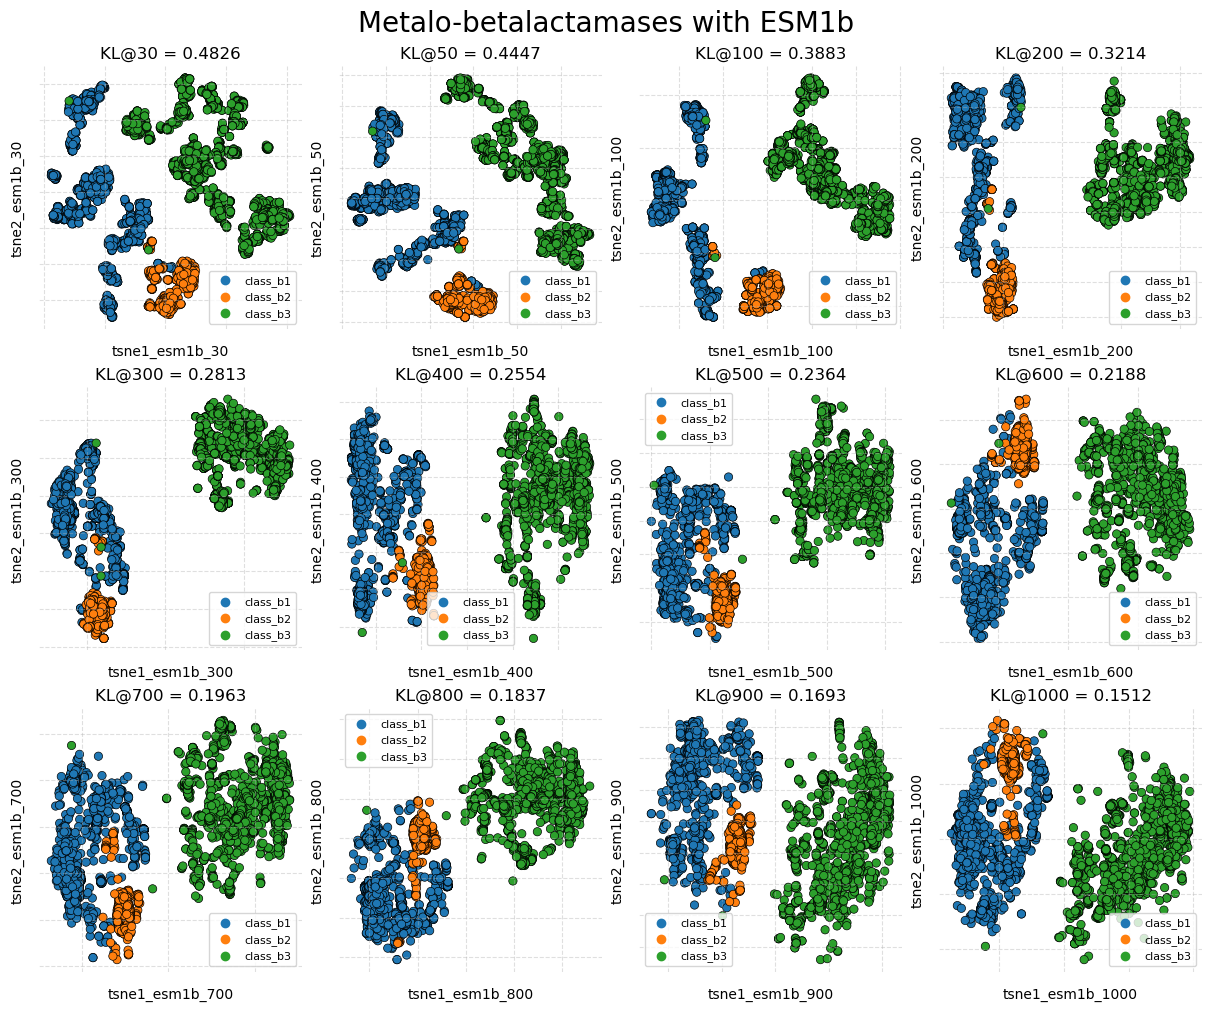

In [16]:
mosaic = """
    ABCD
    EFGH
    IJKL
"""
hue="bla_class"

ax = plt.figure(figsize=(12,10), constrained_layout = True).subplot_mosaic(mosaic) 

sns.scatterplot(mbl, x="tsne1_esm1b_30",   y="tsne2_esm1b_30",   hue=hue, edgecolor="k", ax=ax["A"])
sns.scatterplot(mbl, x="tsne1_esm1b_50",   y="tsne2_esm1b_50",   hue=hue, edgecolor="k", ax=ax["B"])
sns.scatterplot(mbl, x="tsne1_esm1b_100",  y="tsne2_esm1b_100",  hue=hue, edgecolor="k", ax=ax["C"])
sns.scatterplot(mbl, x="tsne1_esm1b_200",  y="tsne2_esm1b_200",  hue=hue, edgecolor="k", ax=ax["D"])
sns.scatterplot(mbl, x="tsne1_esm1b_300",  y="tsne2_esm1b_300",  hue=hue, edgecolor="k", ax=ax["E"])
sns.scatterplot(mbl, x="tsne1_esm1b_400",  y="tsne2_esm1b_400",  hue=hue, edgecolor="k", ax=ax["F"])
sns.scatterplot(mbl, x="tsne1_esm1b_500",  y="tsne2_esm1b_500",  hue=hue, edgecolor="k", ax=ax["G"])
sns.scatterplot(mbl, x="tsne1_esm1b_600",  y="tsne2_esm1b_600",  hue=hue, edgecolor="k", ax=ax["H"])
sns.scatterplot(mbl, x="tsne1_esm1b_700",  y="tsne2_esm1b_700",  hue=hue, edgecolor="k", ax=ax["I"])
sns.scatterplot(mbl, x="tsne1_esm1b_800",  y="tsne2_esm1b_800",  hue=hue, edgecolor="k", ax=ax["J"])
sns.scatterplot(mbl, x="tsne1_esm1b_900",  y="tsne2_esm1b_900",  hue=hue, edgecolor="k", ax=ax["K"])
sns.scatterplot(mbl, x="tsne1_esm1b_1000", y="tsne2_esm1b_1000", hue=hue, edgecolor="k", ax=ax["L"])


ax["A"].set_title(f"KL@{perplexity[0]} = {kl_mbl_esm1b[0]}")
ax["B"].set_title(f"KL@{perplexity[1]} = {kl_mbl_esm1b[1]}")
ax["C"].set_title(f"KL@{perplexity[2]} = {kl_mbl_esm1b[2]}")
ax["D"].set_title(f"KL@{perplexity[3]} = {kl_mbl_esm1b[3]}")
ax["E"].set_title(f"KL@{perplexity[4]} = {kl_mbl_esm1b[4]}")
ax["F"].set_title(f"KL@{perplexity[5]} = {kl_mbl_esm1b[5]}")
ax["G"].set_title(f"KL@{perplexity[6]} = {kl_mbl_esm1b[6]}")
ax["H"].set_title(f"KL@{perplexity[7]} = {kl_mbl_esm1b[7]}")
ax["I"].set_title(f"KL@{perplexity[8]} = {kl_mbl_esm1b[8]}")
ax["J"].set_title(f"KL@{perplexity[9]} = {kl_mbl_esm1b[9]}")
ax["K"].set_title(f"KL@{perplexity[10]} = {kl_mbl_esm1b[10]}")
ax["L"].set_title(f"KL@{perplexity[11]} = {kl_mbl_esm1b[11]}")

for i in "ABCDEFGHIJKL":
    ax[i].grid(alpha=0.4, linestyle="--")
    ax[i].set_frame_on(False)
    ax[i].legend(frameon=True, fontsize=8)
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])
    ax[i].tick_params(axis='both', colors='white')
    
plt.suptitle("Metalo-betalactamases with ESM1b",fontsize=20);

In [20]:
mosaic = """
    ABCDEFGHIJKL
"""

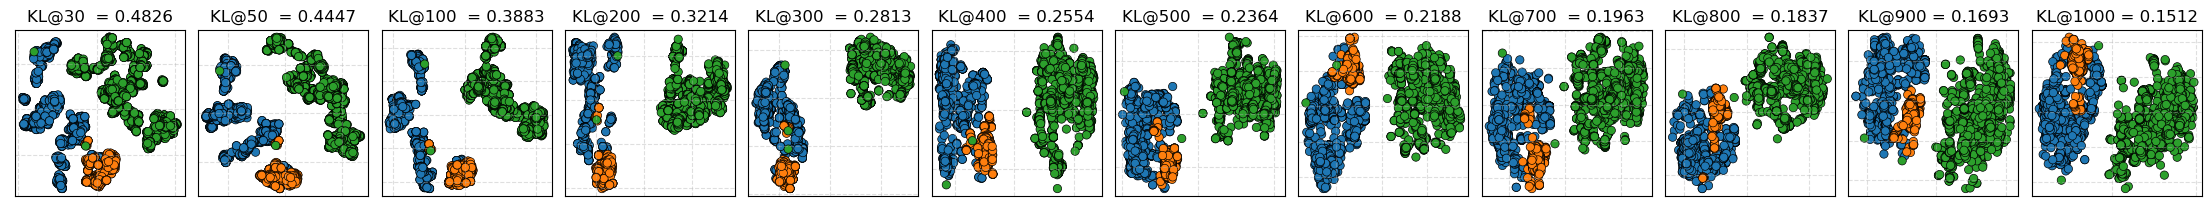

In [21]:
ax = plt.figure(figsize=(22,2), constrained_layout = True).subplot_mosaic(mosaic) 

sns.scatterplot(mbl, x="tsne1_esm1b_30",   y="tsne2_esm1b_30",   hue=hue, edgecolor="k", ax=ax["A"])
sns.scatterplot(mbl, x="tsne1_esm1b_50",   y="tsne2_esm1b_50",   hue=hue, edgecolor="k", ax=ax["B"])
sns.scatterplot(mbl, x="tsne1_esm1b_100",  y="tsne2_esm1b_100",  hue=hue, edgecolor="k", ax=ax["C"])
sns.scatterplot(mbl, x="tsne1_esm1b_200",  y="tsne2_esm1b_200",  hue=hue, edgecolor="k", ax=ax["D"])
sns.scatterplot(mbl, x="tsne1_esm1b_300",  y="tsne2_esm1b_300",  hue=hue, edgecolor="k", ax=ax["E"])
sns.scatterplot(mbl, x="tsne1_esm1b_400",  y="tsne2_esm1b_400",  hue=hue, edgecolor="k", ax=ax["F"])
sns.scatterplot(mbl, x="tsne1_esm1b_500",  y="tsne2_esm1b_500",  hue=hue, edgecolor="k", ax=ax["G"])
sns.scatterplot(mbl, x="tsne1_esm1b_600",  y="tsne2_esm1b_600",  hue=hue, edgecolor="k", ax=ax["H"])
sns.scatterplot(mbl, x="tsne1_esm1b_700",  y="tsne2_esm1b_700",  hue=hue, edgecolor="k", ax=ax["I"])
sns.scatterplot(mbl, x="tsne1_esm1b_800",  y="tsne2_esm1b_800",  hue=hue, edgecolor="k", ax=ax["J"])
sns.scatterplot(mbl, x="tsne1_esm1b_900",  y="tsne2_esm1b_900",  hue=hue, edgecolor="k", ax=ax["K"])
sns.scatterplot(mbl, x="tsne1_esm1b_1000", y="tsne2_esm1b_1000", hue=hue, edgecolor="k", ax=ax["L"])

ax["A"].set_title(f"KL@{perplexity[0]}  = {kl_mbl_esm1b[0]}" , fontsize=12)
ax["B"].set_title(f"KL@{perplexity[1]}  = {kl_mbl_esm1b[1]}" , fontsize=12)
ax["C"].set_title(f"KL@{perplexity[2]}  = {kl_mbl_esm1b[2]}" , fontsize=12)
ax["D"].set_title(f"KL@{perplexity[3]}  = {kl_mbl_esm1b[3]}" , fontsize=12)
ax["E"].set_title(f"KL@{perplexity[4]}  = {kl_mbl_esm1b[4]}" , fontsize=12)
ax["F"].set_title(f"KL@{perplexity[5]}  = {kl_mbl_esm1b[5]}" , fontsize=12)
ax["G"].set_title(f"KL@{perplexity[6]}  = {kl_mbl_esm1b[6]}" , fontsize=12)
ax["H"].set_title(f"KL@{perplexity[7]}  = {kl_mbl_esm1b[7]}" , fontsize=12)
ax["I"].set_title(f"KL@{perplexity[8]}  = {kl_mbl_esm1b[8]}" , fontsize=12)
ax["J"].set_title(f"KL@{perplexity[9]}  = {kl_mbl_esm1b[9]}" , fontsize=12)
ax["K"].set_title(f"KL@{perplexity[10]} = {kl_mbl_esm1b[10]}", fontsize=12)
ax["L"].set_title(f"KL@{perplexity[11]} = {kl_mbl_esm1b[11]}", fontsize=12)

for i in "ABCDEFGHIJKL":
    ax[i].grid(alpha=0.4, linestyle="--")
    ax[i].legend().set_visible(False)
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")

for i in "ABCDEFGHIJKL":
    ax[i].tick_params(color='white', labelcolor='white')
    for spine in ax[i].spines.values():
        spine.set_edgecolor('black')

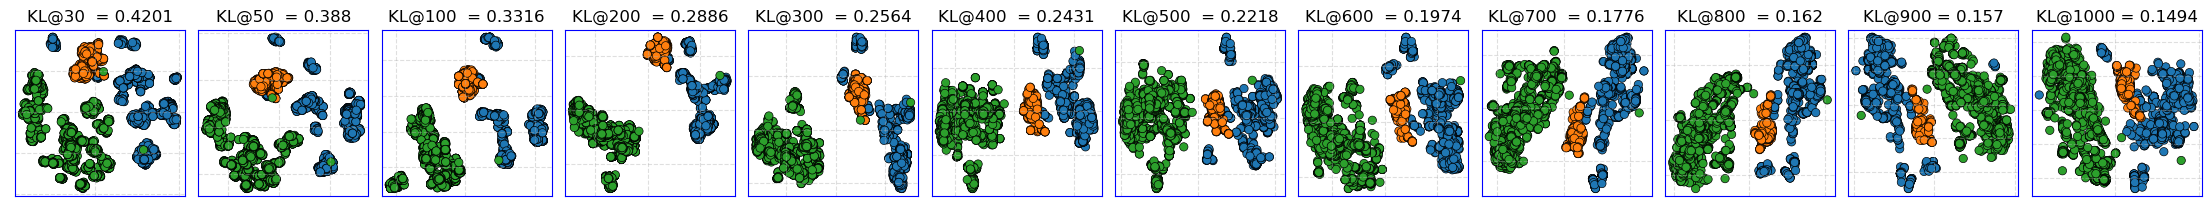

In [22]:
ax = plt.figure(figsize=(22,2), constrained_layout = True).subplot_mosaic(mosaic) 

sns.scatterplot(mbl, x="tsne1_esm2_3b_30",   y="tsne2_esm2_3b_30",   hue=hue, edgecolor="k", ax=ax["A"])
sns.scatterplot(mbl, x="tsne1_esm2_3b_50",   y="tsne2_esm2_3b_50",   hue=hue, edgecolor="k", ax=ax["B"])
sns.scatterplot(mbl, x="tsne1_esm2_3b_100",  y="tsne2_esm2_3b_100",  hue=hue, edgecolor="k", ax=ax["C"])
sns.scatterplot(mbl, x="tsne1_esm2_3b_200",  y="tsne2_esm2_3b_200",  hue=hue, edgecolor="k", ax=ax["D"])
sns.scatterplot(mbl, x="tsne1_esm2_3b_300",  y="tsne2_esm2_3b_300",  hue=hue, edgecolor="k", ax=ax["E"])
sns.scatterplot(mbl, x="tsne1_esm2_3b_400",  y="tsne2_esm2_3b_400",  hue=hue, edgecolor="k", ax=ax["F"])
sns.scatterplot(mbl, x="tsne1_esm2_3b_500",  y="tsne2_esm2_3b_500",  hue=hue, edgecolor="k", ax=ax["G"])
sns.scatterplot(mbl, x="tsne1_esm2_3b_600",  y="tsne2_esm2_3b_600",  hue=hue, edgecolor="k", ax=ax["H"])
sns.scatterplot(mbl, x="tsne1_esm2_3b_700",  y="tsne2_esm2_3b_700",  hue=hue, edgecolor="k", ax=ax["I"])
sns.scatterplot(mbl, x="tsne1_esm2_3b_800",  y="tsne2_esm2_3b_800",  hue=hue, edgecolor="k", ax=ax["J"])
sns.scatterplot(mbl, x="tsne1_esm2_3b_900",  y="tsne2_esm2_3b_900",  hue=hue, edgecolor="k", ax=ax["K"])
sns.scatterplot(mbl, x="tsne1_esm2_3b_1000", y="tsne2_esm2_3b_1000", hue=hue, edgecolor="k", ax=ax["L"])

ax["A"].set_title(f"KL@{perplexity[0]}  = {kl_mbl_esm2_3b[0]}" , fontsize=12)
ax["B"].set_title(f"KL@{perplexity[1]}  = {kl_mbl_esm2_3b[1]}" , fontsize=12)
ax["C"].set_title(f"KL@{perplexity[2]}  = {kl_mbl_esm2_3b[2]}" , fontsize=12)
ax["D"].set_title(f"KL@{perplexity[3]}  = {kl_mbl_esm2_3b[3]}" , fontsize=12)
ax["E"].set_title(f"KL@{perplexity[4]}  = {kl_mbl_esm2_3b[4]}" , fontsize=12)
ax["F"].set_title(f"KL@{perplexity[5]}  = {kl_mbl_esm2_3b[5]}" , fontsize=12)
ax["G"].set_title(f"KL@{perplexity[6]}  = {kl_mbl_esm2_3b[6]}" , fontsize=12)
ax["H"].set_title(f"KL@{perplexity[7]}  = {kl_mbl_esm2_3b[7]}" , fontsize=12)
ax["I"].set_title(f"KL@{perplexity[8]}  = {kl_mbl_esm2_3b[8]}" , fontsize=12)
ax["J"].set_title(f"KL@{perplexity[9]}  = {kl_mbl_esm2_3b[9]}" , fontsize=12)
ax["K"].set_title(f"KL@{perplexity[10]} = {kl_mbl_esm2_3b[10]}", fontsize=12)
ax["L"].set_title(f"KL@{perplexity[11]} = {kl_mbl_esm2_3b[11]}", fontsize=12)

for i in "ABCDEFGHIJKL":
    ax[i].grid(alpha=0.4, linestyle="--")
    ax[i].legend().set_visible(False)
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")

for i in "ABCDEFGHIJKL":
    ax[i].tick_params(color='white', labelcolor='white')
    for spine in ax[i].spines.values():
        spine.set_edgecolor('blue')

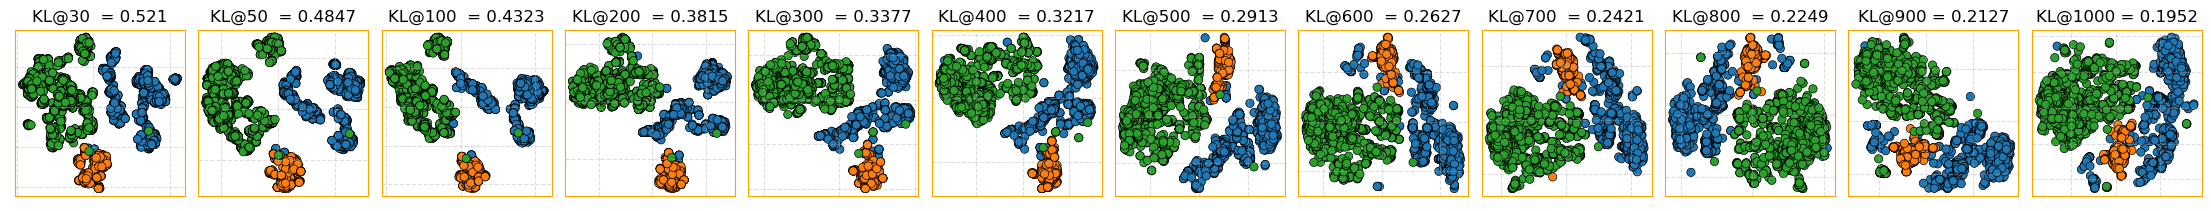

In [23]:
ax = plt.figure(figsize=(22,2), constrained_layout = True).subplot_mosaic(mosaic) 

sns.scatterplot(mbl, x="tsne1_esm2_650m_30",   y="tsne2_esm2_650m_30",   hue=hue, edgecolor="k", ax=ax["A"])
sns.scatterplot(mbl, x="tsne1_esm2_650m_50",   y="tsne2_esm2_650m_50",   hue=hue, edgecolor="k", ax=ax["B"])
sns.scatterplot(mbl, x="tsne1_esm2_650m_100",  y="tsne2_esm2_650m_100",  hue=hue, edgecolor="k", ax=ax["C"])
sns.scatterplot(mbl, x="tsne1_esm2_650m_200",  y="tsne2_esm2_650m_200",  hue=hue, edgecolor="k", ax=ax["D"])
sns.scatterplot(mbl, x="tsne1_esm2_650m_300",  y="tsne2_esm2_650m_300",  hue=hue, edgecolor="k", ax=ax["E"])
sns.scatterplot(mbl, x="tsne1_esm2_650m_400",  y="tsne2_esm2_650m_400",  hue=hue, edgecolor="k", ax=ax["F"])
sns.scatterplot(mbl, x="tsne1_esm2_650m_500",  y="tsne2_esm2_650m_500",  hue=hue, edgecolor="k", ax=ax["G"])
sns.scatterplot(mbl, x="tsne1_esm2_650m_600",  y="tsne2_esm2_650m_600",  hue=hue, edgecolor="k", ax=ax["H"])
sns.scatterplot(mbl, x="tsne1_esm2_650m_700",  y="tsne2_esm2_650m_700",  hue=hue, edgecolor="k", ax=ax["I"])
sns.scatterplot(mbl, x="tsne1_esm2_650m_800",  y="tsne2_esm2_650m_800",  hue=hue, edgecolor="k", ax=ax["J"])
sns.scatterplot(mbl, x="tsne1_esm2_650m_900",  y="tsne2_esm2_650m_900",  hue=hue, edgecolor="k", ax=ax["K"])
sns.scatterplot(mbl, x="tsne1_esm2_650m_1000", y="tsne2_esm2_650m_1000", hue=hue, edgecolor="k", ax=ax["L"])

ax["A"].set_title(f"KL@{perplexity[0]}  = {kl_mbl_esm2_650m[0]}" , fontsize=12)
ax["B"].set_title(f"KL@{perplexity[1]}  = {kl_mbl_esm2_650m[1]}" , fontsize=12)
ax["C"].set_title(f"KL@{perplexity[2]}  = {kl_mbl_esm2_650m[2]}" , fontsize=12)
ax["D"].set_title(f"KL@{perplexity[3]}  = {kl_mbl_esm2_650m[3]}" , fontsize=12)
ax["E"].set_title(f"KL@{perplexity[4]}  = {kl_mbl_esm2_650m[4]}" , fontsize=12)
ax["F"].set_title(f"KL@{perplexity[5]}  = {kl_mbl_esm2_650m[5]}" , fontsize=12)
ax["G"].set_title(f"KL@{perplexity[6]}  = {kl_mbl_esm2_650m[6]}" , fontsize=12)
ax["H"].set_title(f"KL@{perplexity[7]}  = {kl_mbl_esm2_650m[7]}" , fontsize=12)
ax["I"].set_title(f"KL@{perplexity[8]}  = {kl_mbl_esm2_650m[8]}" , fontsize=12)
ax["J"].set_title(f"KL@{perplexity[9]}  = {kl_mbl_esm2_650m[9]}" , fontsize=12)
ax["K"].set_title(f"KL@{perplexity[10]} = {kl_mbl_esm2_650m[10]}", fontsize=12)
ax["L"].set_title(f"KL@{perplexity[11]} = {kl_mbl_esm2_650m[11]}", fontsize=12)

for i in "ABCDEFGHIJKL":
    ax[i].grid(alpha=0.4, linestyle="--")
    ax[i].legend().set_visible(False)
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")

for i in "ABCDEFGHIJKL":
    ax[i].tick_params(color='white', labelcolor='white')
    for spine in ax[i].spines.values():
        spine.set_edgecolor('orange')

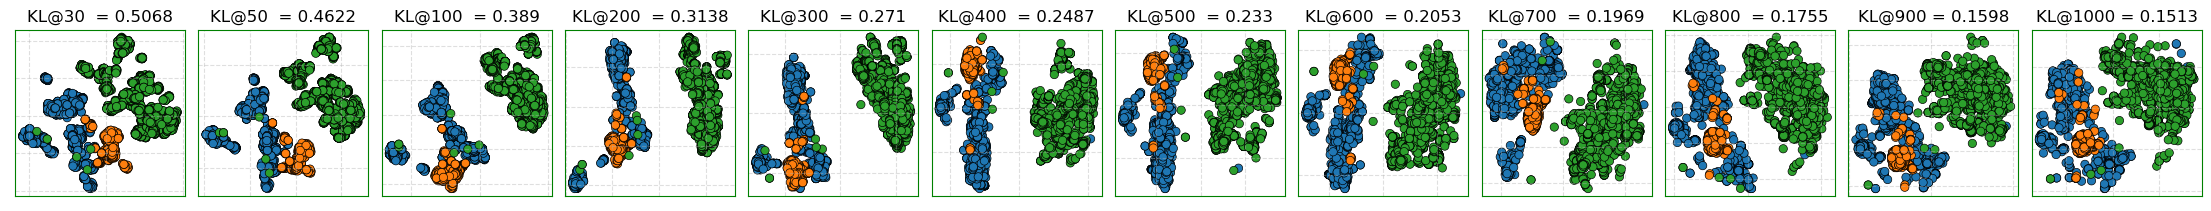

In [24]:
ax = plt.figure(figsize=(22,2), constrained_layout = True).subplot_mosaic(mosaic) 

sns.scatterplot(mbl, x="tsne1_carp_30",   y="tsne2_carp_30",   hue=hue, edgecolor="k", ax=ax["A"])
sns.scatterplot(mbl, x="tsne1_carp_50",   y="tsne2_carp_50",   hue=hue, edgecolor="k", ax=ax["B"])
sns.scatterplot(mbl, x="tsne1_carp_100",  y="tsne2_carp_100",  hue=hue, edgecolor="k", ax=ax["C"])
sns.scatterplot(mbl, x="tsne1_carp_200",  y="tsne2_carp_200",  hue=hue, edgecolor="k", ax=ax["D"])
sns.scatterplot(mbl, x="tsne1_carp_300",  y="tsne2_carp_300",  hue=hue, edgecolor="k", ax=ax["E"])
sns.scatterplot(mbl, x="tsne1_carp_400",  y="tsne2_carp_400",  hue=hue, edgecolor="k", ax=ax["F"])
sns.scatterplot(mbl, x="tsne1_carp_500",  y="tsne2_carp_500",  hue=hue, edgecolor="k", ax=ax["G"])
sns.scatterplot(mbl, x="tsne1_carp_600",  y="tsne2_carp_600",  hue=hue, edgecolor="k", ax=ax["H"])
sns.scatterplot(mbl, x="tsne1_carp_700",  y="tsne2_carp_700",  hue=hue, edgecolor="k", ax=ax["I"])
sns.scatterplot(mbl, x="tsne1_carp_800",  y="tsne2_carp_800",  hue=hue, edgecolor="k", ax=ax["J"])
sns.scatterplot(mbl, x="tsne1_carp_900",  y="tsne2_carp_900",  hue=hue, edgecolor="k", ax=ax["K"])
sns.scatterplot(mbl, x="tsne1_carp_1000", y="tsne2_carp_1000", hue=hue, edgecolor="k", ax=ax["L"])

ax["A"].set_title(f"KL@{perplexity[0]}  = {kl_mbl_carp[0]}" , fontsize=12)
ax["B"].set_title(f"KL@{perplexity[1]}  = {kl_mbl_carp[1]}" , fontsize=12)
ax["C"].set_title(f"KL@{perplexity[2]}  = {kl_mbl_carp[2]}" , fontsize=12)
ax["D"].set_title(f"KL@{perplexity[3]}  = {kl_mbl_carp[3]}" , fontsize=12)
ax["E"].set_title(f"KL@{perplexity[4]}  = {kl_mbl_carp[4]}" , fontsize=12)
ax["F"].set_title(f"KL@{perplexity[5]}  = {kl_mbl_carp[5]}" , fontsize=12)
ax["G"].set_title(f"KL@{perplexity[6]}  = {kl_mbl_carp[6]}" , fontsize=12)
ax["H"].set_title(f"KL@{perplexity[7]}  = {kl_mbl_carp[7]}" , fontsize=12)
ax["I"].set_title(f"KL@{perplexity[8]}  = {kl_mbl_carp[8]}" , fontsize=12)
ax["J"].set_title(f"KL@{perplexity[9]}  = {kl_mbl_carp[9]}" , fontsize=12)
ax["K"].set_title(f"KL@{perplexity[10]} = {kl_mbl_carp[10]}", fontsize=12)
ax["L"].set_title(f"KL@{perplexity[11]} = {kl_mbl_carp[11]}", fontsize=12)

for i in "ABCDEFGHIJKL":
    ax[i].grid(alpha=0.4, linestyle="--")
    ax[i].legend().set_visible(False)
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")

for i in "ABCDEFGHIJKL":
    ax[i].tick_params(color='white', labelcolor='white')
    for spine in ax[i].spines.values():
        spine.set_edgecolor('green')

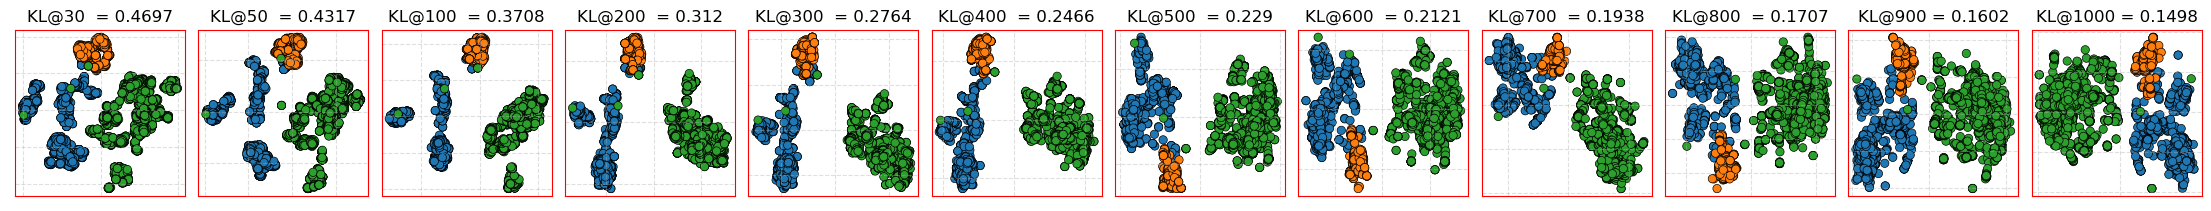

In [25]:
ax = plt.figure(figsize=(22,2), constrained_layout = True).subplot_mosaic(mosaic) 

sns.scatterplot(mbl, x="tsne1_t5xlu50_30",   y="tsne2_t5xlu50_30",   hue=hue, edgecolor="k", ax=ax["A"])
sns.scatterplot(mbl, x="tsne1_t5xlu50_50",   y="tsne2_t5xlu50_50",   hue=hue, edgecolor="k", ax=ax["B"])
sns.scatterplot(mbl, x="tsne1_t5xlu50_100",  y="tsne2_t5xlu50_100",  hue=hue, edgecolor="k", ax=ax["C"])
sns.scatterplot(mbl, x="tsne1_t5xlu50_200",  y="tsne2_t5xlu50_200",  hue=hue, edgecolor="k", ax=ax["D"])
sns.scatterplot(mbl, x="tsne1_t5xlu50_300",  y="tsne2_t5xlu50_300",  hue=hue, edgecolor="k", ax=ax["E"])
sns.scatterplot(mbl, x="tsne1_t5xlu50_400",  y="tsne2_t5xlu50_400",  hue=hue, edgecolor="k", ax=ax["F"])
sns.scatterplot(mbl, x="tsne1_t5xlu50_500",  y="tsne2_t5xlu50_500",  hue=hue, edgecolor="k", ax=ax["G"])
sns.scatterplot(mbl, x="tsne1_t5xlu50_600",  y="tsne2_t5xlu50_600",  hue=hue, edgecolor="k", ax=ax["H"])
sns.scatterplot(mbl, x="tsne1_t5xlu50_700",  y="tsne2_t5xlu50_700",  hue=hue, edgecolor="k", ax=ax["I"])
sns.scatterplot(mbl, x="tsne1_t5xlu50_800",  y="tsne2_t5xlu50_800",  hue=hue, edgecolor="k", ax=ax["J"])
sns.scatterplot(mbl, x="tsne1_t5xlu50_900",  y="tsne2_t5xlu50_900",  hue=hue, edgecolor="k", ax=ax["K"])
sns.scatterplot(mbl, x="tsne1_t5xlu50_1000", y="tsne2_t5xlu50_1000", hue=hue, edgecolor="k", ax=ax["L"])

ax["A"].set_title(f"KL@{perplexity[0]}  = {kl_mbl_t5[0]}" , fontsize=12)
ax["B"].set_title(f"KL@{perplexity[1]}  = {kl_mbl_t5[1]}" , fontsize=12)
ax["C"].set_title(f"KL@{perplexity[2]}  = {kl_mbl_t5[2]}" , fontsize=12)
ax["D"].set_title(f"KL@{perplexity[3]}  = {kl_mbl_t5[3]}" , fontsize=12)
ax["E"].set_title(f"KL@{perplexity[4]}  = {kl_mbl_t5[4]}" , fontsize=12)
ax["F"].set_title(f"KL@{perplexity[5]}  = {kl_mbl_t5[5]}" , fontsize=12)
ax["G"].set_title(f"KL@{perplexity[6]}  = {kl_mbl_t5[6]}" , fontsize=12)
ax["H"].set_title(f"KL@{perplexity[7]}  = {kl_mbl_t5[7]}" , fontsize=12)
ax["I"].set_title(f"KL@{perplexity[8]}  = {kl_mbl_t5[8]}" , fontsize=12)
ax["J"].set_title(f"KL@{perplexity[9]}  = {kl_mbl_t5[9]}" , fontsize=12)
ax["K"].set_title(f"KL@{perplexity[10]} = {kl_mbl_t5[10]}", fontsize=12)
ax["L"].set_title(f"KL@{perplexity[11]} = {kl_mbl_t5[11]}", fontsize=12)

for i in "ABCDEFGHIJKL":
    ax[i].grid(alpha=0.4, linestyle="--")
    ax[i].legend().set_visible(False)
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")

for i in "ABCDEFGHIJKL":
    ax[i].tick_params(color='white', labelcolor='white')
    for spine in ax[i].spines.values():
        spine.set_edgecolor('red')